In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/credit_data/german_credit_data.csv")


In [2]:
df.head

<bound method NDFrame.head of      Unnamed: 0  Age     Sex  ...  Duration              Purpose  Risk
0             0   67    male  ...         6             radio/TV  good
1             1   22  female  ...        48             radio/TV   bad
2             2   49    male  ...        12            education  good
3             3   45    male  ...        42  furniture/equipment  good
4             4   53    male  ...        24                  car   bad
..          ...  ...     ...  ...       ...                  ...   ...
995         995   31  female  ...        12  furniture/equipment  good
996         996   40    male  ...        30                  car  good
997         997   38    male  ...        12             radio/TV  good
998         998   23    male  ...        45             radio/TV   bad
999         999   27    male  ...        45                  car  good

[1000 rows x 11 columns]>

In [3]:
df.info()
#There are 1000 instances in the dataset, which means this is a very small dataset
#There appears to be missing values
#The data is comprised of numerical and categorical attributes(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
#Let's view the categorical values aka "levels"
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [5]:
df["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [6]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [8]:
df["Purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [9]:
df["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

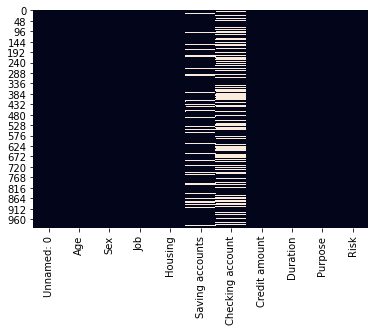

In [10]:
#Since the only missing values are categorical, let's plot those rn
sns.heatmap(df.isnull(), cbar=False)

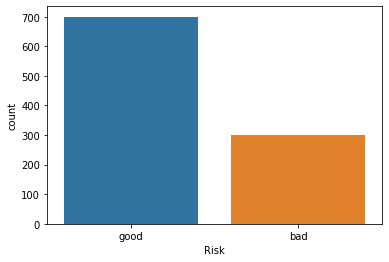

In [11]:
#Lets look at the target variable
sns.countplot(x = "Risk", data = df)

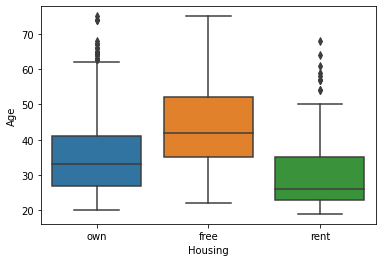

In [12]:
sns.boxplot(x = "Housing", y = "Age", data = df)

In [13]:
corr_matrix = df.corr()
corr_matrix["Credit amount"].sort_values(ascending = False)

Credit amount    1.000000
Duration         0.624984
Job              0.285385
Age              0.032716
Unnamed: 0       0.013488
Name: Credit amount, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa71506eb8>,
      dtype=object)

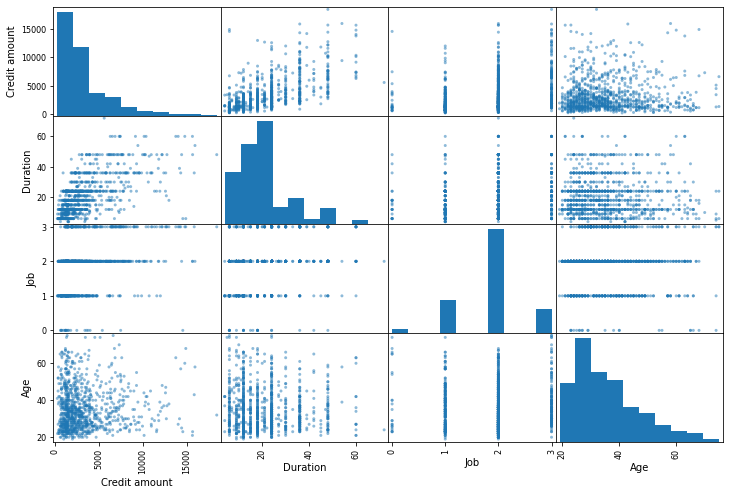

In [14]:
attributes = ["Credit amount", "Duration", "Job", "Age"]
scatter_matrix(df[attributes], figsize = (12, 8))

In [15]:
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.drop(["Age"], axis = 1)

In [16]:
Quantitative = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Quantitative_V = []
for i in df.columns:
    if df[i].dtype in Quantitative:
        Quantitative_V.append(i)
df.update(df[Quantitative_V].fillna(df.mean, inplace = True))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [17]:
df.fillna("change", inplace=True)

filter = (df['Saving accounts'] == "change") & (df['Checking account'] == "little") 

df['Saving accounts'] = df['Saving accounts'].where(~filter, "little")

filter = (df['Checking account'] == "change") & (df['Saving accounts'] == "little")

df['Checking account'] = df['Checking account'].where(~filter, "little")

#------------------------------------------------------------------------------------------------------------------#

filter = (df['Saving accounts'] == "change") & (df['Checking account'] == "moderate")

df['Saving accounts'] = df['Saving accounts'].where(~filter, "moderate")

filter = (df['Checking account'] == "change") & (df['Saving accounts'] == "moderate")

df['Checking account'] = df['Checking account'].where(~filter, "moderate")

#-------------------------------------------------------------------------------------------------------------------#


filter = (df['Saving accounts'] == "change") & (df['Checking account'] == "rich")

df['Saving accounts'] = df['Saving accounts'].where(~filter, "rich")

filter = (df['Checking account'] == "change") & (df['Saving accounts'] == "rich")

df['Checking account'] = df['Checking account'].where(~filter, "rich")
#-------------------------------------------------------------------------------------------------------------------#

filter = (df['Saving accounts'] == "quite rich") & (df['Checking account'] == "change")

df['Checking account'] = df['Checking account'].where(~filter, "quite rich")

df = df.replace("change", np.nan)

#Realization ahead: using the above conditional statements to fill in na values for checking account and savings account 
# Some model perform better
# Some models perform slightly worse with the above code + fillna(x.value_counts)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               1000 non-null   object
 1   Job               1000 non-null   int64 
 2   Housing           1000 non-null   object
 3   Saving accounts   901 non-null    object
 4   Checking account  901 non-null    object
 5   Credit amount     1000 non-null   int64 
 6   Duration          1000 non-null   int64 
 7   Purpose           1000 non-null   object
 8   Risk              1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [19]:
#We still have some missing values after are conditional cleaning
#Let's fill these values with the above suggestiom
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               1000 non-null   object
 1   Job               1000 non-null   int64 
 2   Housing           1000 non-null   object
 3   Saving accounts   1000 non-null   object
 4   Checking account  1000 non-null   object
 5   Credit amount     1000 non-null   int64 
 6   Duration          1000 non-null   int64 
 7   Purpose           1000 non-null   object
 8   Risk              1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [21]:
df = pd.get_dummies(df, columns = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Job                          1000 non-null   int64 
 1   Credit amount                1000 non-null   int64 
 2   Duration                     1000 non-null   int64 
 3   Risk                         1000 non-null   object
 4   Sex_female                   1000 non-null   uint8 
 5   Sex_male                     1000 non-null   uint8 
 6   Housing_free                 1000 non-null   uint8 
 7   Housing_own                  1000 non-null   uint8 
 8   Housing_rent                 1000 non-null   uint8 
 9   Saving accounts_little       1000 non-null   uint8 
 10  Saving accounts_moderate     1000 non-null   uint8 
 11  Saving accounts_quite rich   1000 non-null   uint8 
 12  Saving accounts_rich         1000 non-null   uint8 
 13  Checking account_little      1000 

In [23]:
df.head()

,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_quite rich,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,1169,6,good,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,5951,48,bad,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,2096,12,good,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2,7882,42,good,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2,4870,24,bad,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X, y = df.loc[:, df.columns != "Risk"], df[["Risk"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
#Import PipeLine
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [26]:
#Import performance measures
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = make_pipeline(DecisionTreeClassifier())

DT_model = DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

print("Accuracy_Score = ", accuracy_score(y_test, DT_pred))
print("Precision Score = ", precision_score(y_test, DT_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, DT_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, DT_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, DT_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, DT_pred))


Accuracy_Score =  0.628
Precision Score =  0.7544910179640718
Recall Score =  0.7078651685393258
f1 score good =  0.7304347826086955
f1 score bad =  0.4
CM [[ 31  41]
 [ 52 126]]


In [28]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = make_pipeline(GaussianNB())

NB_model = NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

print("Accuracy_Score = ", accuracy_score(y_test, NB_pred))
print("Precision Score = ", precision_score(y_test, NB_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, NB_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, NB_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, NB_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, NB_pred))

Accuracy_Score =  0.612
Precision Score =  0.7425149700598802
Recall Score =  0.6966292134831461
f1 score good =  0.7188405797101449
f1 score bad =  0.3741935483870968
CM [[ 29  43]
 [ 54 124]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
KNN = make_pipeline(KNeighborsClassifier())

KNN_model = KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

print("Accuracy_Score = ", accuracy_score(y_test, KNN_pred))
print("Precision Score = ", precision_score(y_test, KNN_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, KNN_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, KNN_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, KNN_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, KNN_pred))

Accuracy_Score =  0.668
Precision Score =  0.7251184834123223
Recall Score =  0.8595505617977528
f1 score good =  0.7866323907455013
f1 score bad =  0.25225225225225223
CM [[ 14  58]
 [ 25 153]]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = make_pipeline(LogisticRegression())

LR_model = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

print("Accuracy_Score = ", accuracy_score(y_test, LR_pred))
print("Precision Score = ", precision_score(y_test, LR_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, LR_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, LR_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, LR_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, LR_pred))

Accuracy_Score =  0.716
Precision Score =  0.7442922374429224
Recall Score =  0.9157303370786517
f1 score good =  0.8211586901763225
f1 score bad =  0.3106796116504854
CM [[ 16  56]
 [ 15 163]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
#SVM
from sklearn.svm import SVC
SVM = make_pipeline(SVC())

SVM_model = SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

print("Accuracy_Score = ", accuracy_score(y_test, SVM_pred))
print("Precision Score = ", precision_score(y_test, SVM_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, SVM_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, SVM_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, SVM_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, SVM_pred))

Accuracy_Score =  0.724
Precision Score =  0.7224489795918367
Recall Score =  0.9943820224719101
f1 score good =  0.8368794326241134
f1 score bad =  0.10389610389610389
CM [[  4  68]
 [  1 177]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.preprocessing import StandardScaler
X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

In [36]:
#Decision Tree Standardized
from sklearn.tree import DecisionTreeClassifier
DT_s = make_pipeline(DecisionTreeClassifier())

DT_model_s = DT.fit(X_train_s, y_train)
DT_pred_s = DT.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, DT_pred_s))
print("Precision Score = ", precision_score(y_test, DT_pred_s, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, DT_pred_s, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, DT_pred_s, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, DT_pred_s, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, DT_pred_s))

Accuracy_Score =  0.628
Precision Score =  0.7707006369426752
Recall Score =  0.6797752808988764
f1 score good =  0.7223880597014924
f1 score bad =  0.43636363636363634
CM [[ 36  36]
 [ 57 121]]


In [37]:
#Naive Bayes Standardized
from sklearn.naive_bayes import GaussianNB
NB_s = make_pipeline(GaussianNB())

NB_model_s = NB.fit(X_train_s, y_train)
NB_pred_s = NB.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, NB_pred_s))
print("Precision Score = ", precision_score(y_test, NB_pred_s, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, NB_pred_s, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, NB_pred_s, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, NB_pred_s, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, NB_pred_s))

Accuracy_Score =  0.608
Precision Score =  0.7439024390243902
Recall Score =  0.6853932584269663
f1 score good =  0.7134502923976609
f1 score bad =  0.379746835443038
CM [[ 30  42]
 [ 56 122]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#K Nearest Neighbor Standardized
from sklearn.neighbors import KNeighborsClassifier
KNN_s = make_pipeline(KNeighborsClassifier())

KNN_model_s = KNN.fit(X_train_s, y_train)
KNN_pred_s = KNN.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, KNN_pred_s))
print("Precision Score = ", precision_score(y_test, KNN_pred_s, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, KNN_pred_s, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, KNN_pred_s, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, KNN_pred_s, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, KNN_pred_s))

Accuracy_Score =  0.676
Precision Score =  0.7365853658536585
Recall Score =  0.848314606741573
f1 score good =  0.7885117493472585
f1 score bad =  0.3076923076923077
CM [[ 18  54]
 [ 27 151]]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [39]:
#Logistic Regression Standardized
from sklearn.linear_model import LogisticRegression
LR_s = make_pipeline(LogisticRegression())

LR_model_s = LR.fit(X_train_s, y_train)
LR_pred_s = LR.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, LR_pred_s))
print("Precision Score = ", precision_score(y_test, LR_pred_s, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, LR_pred_s, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, LR_pred_s, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, LR_pred_s, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, LR_pred_s))

Accuracy_Score =  0.704
Precision Score =  0.7407407407407407
Recall Score =  0.898876404494382
f1 score good =  0.8121827411167513
f1 score bad =  0.3018867924528302
CM [[ 16  56]
 [ 18 160]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#SVM Standardized
from sklearn.svm import SVC
SVM_s = make_pipeline(SVC())

SVM_model_s = SVM.fit(X_train_s, y_train)
SVM_pred_s = SVM.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, SVM_pred_s))
print("Precision Score = ", precision_score(y_test, SVM_pred_s, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, SVM_pred_s, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, SVM_pred_s, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, SVM_pred_s, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, SVM_pred_s))

Accuracy_Score =  0.72
Precision Score =  0.726890756302521
Recall Score =  0.9719101123595506
f1 score good =  0.8317307692307693
f1 score bad =  0.16666666666666666
CM [[  7  65]
 [  5 173]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# Pipeline for Random Forest Model (Standardized)
from sklearn.ensemble import RandomForestClassifier
Random = make_pipeline(RandomForestClassifier(n_estimators = 1000,
                                             n_jobs = -1))

Random_model = Random.fit(X_train_s, y_train)
Random_pred = Random.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, Random_pred))
print("Precision Score = ", precision_score(y_test, Random_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, Random_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, Random_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, Random_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, Random_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Accuracy_Score =  0.716
Precision Score =  0.7609756097560976
Recall Score =  0.8764044943820225
f1 score good =  0.814621409921671
f1 score bad =  0.39316239316239315
CM [[ 23  49]
 [ 22 156]]


In [42]:
# Pipeline for AdaBoost Model (Standardized)
# Both imports are required cause AdaBoost can use other algorithms
from sklearn.ensemble import AdaBoostClassifier
ada_class = make_pipeline(AdaBoostClassifier()) #Need to explore learning rate more

ada_model = ada_class.fit(X_train_s, y_train)
ada_pred = ada_class.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, ada_pred))
print("Precision Score = ", precision_score(y_test, ada_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, ada_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, ada_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, ada_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, ada_pred))



Accuracy_Score =  0.692
Precision Score =  0.7348837209302326
Recall Score =  0.8876404494382022
f1 score good =  0.8040712468193384
f1 score bad =  0.28037383177570097
CM [[ 15  57]
 [ 20 158]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Pipeline for XGBOOST classifier
from xgboost import XGBClassifier 
xgb_class = make_pipeline(XGBClassifier())

xgb_model = xgb_class.fit(X_train_s, y_train)
xgb_pred = xgb_class.predict(X_test_s)

print("Accuracy_Score = ", accuracy_score(y_test, xgb_pred))
print("Precision Score = ", precision_score(y_test, xgb_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, xgb_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, xgb_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, xgb_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, xgb_pred))


Accuracy_Score =  0.7
Precision Score =  0.7288888888888889
Recall Score =  0.9213483146067416
f1 score good =  0.8138957816377173
f1 score bad =  0.22680412371134018
CM [[ 11  61]
 [ 14 164]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.ensemble import VotingClassifier
voting_class = VotingClassifier(estimators = [("D_tree", DT_s),
                                           ("Naive", NB_s),
                                           ("Neighbor", KNN_s),
                                           ("Lin_R", LR_s),
                                           ("SVC", SVM_s),
                                            ("rf", Random),
                                           ("ada", ada_class),
                                           ("XGBC", xgb_class)], voting = "hard")


voting_model = voting_class.fit(X_train, y_train)
voting_pred = voting_class.predict(X_test)


  
print("Accuracy_Score = ", accuracy_score(y_test, voting_pred))
print("Precision Score = ", precision_score(y_test, voting_pred, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test, voting_pred, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test, voting_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test, voting_pred, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test, voting_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy_Score =  0.704
Precision Score =  0.7429906542056075
Recall Score =  0.8932584269662921
f1 score good =  0.8112244897959183
f1 score bad =  0.3148148148148148
CM [[ 17  55]
 [ 19 159]]
